<a href="https://colab.research.google.com/github/Sbarzegari/facemorph/blob/master/perceptron_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)  # Convert to column vector

# Preprocess data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


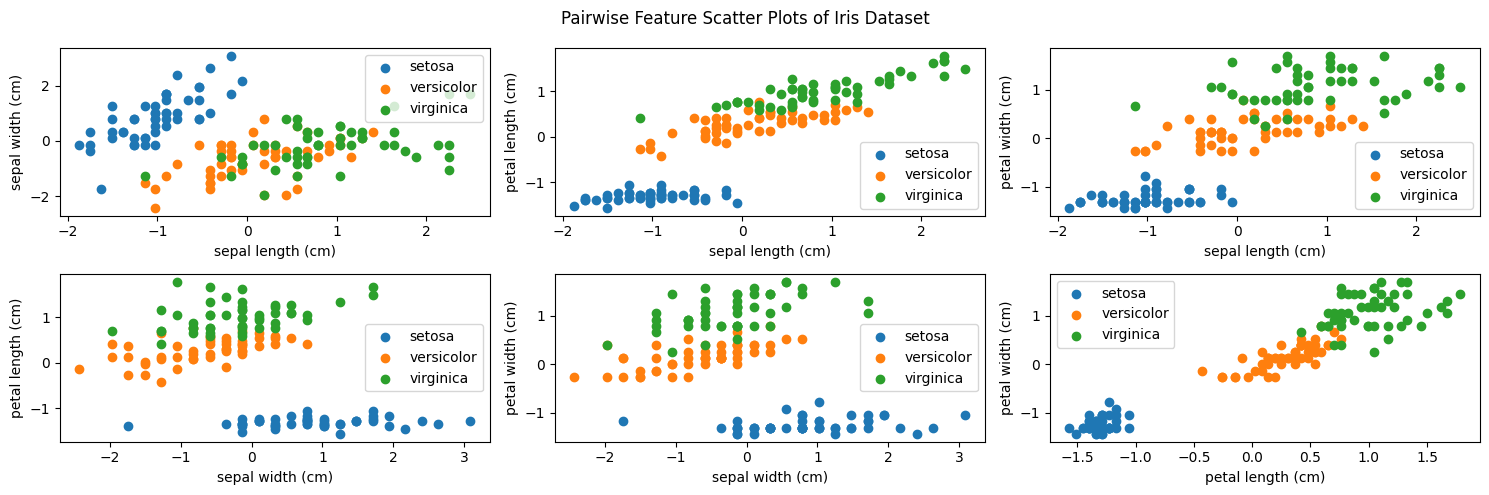

In [ ]:
# Visualization of the data
plt.figure(figsize=(15, 5))

# Feature pair plots
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
feature_names = iris.feature_names
target_names = iris.target_names

for i, (f1, f2) in enumerate(feature_pairs):
    plt.subplot(2, 3, i+1)
    for target in np.unique(iris.target):
        plt.scatter(X[iris.target == target, f1],
                    X[iris.target == target, f2],
                    label=target_names[target])
    plt.xlabel(feature_names[f1])
    plt.ylabel(feature_names[f2])
    plt.legend()

plt.suptitle('Pairwise Feature Scatter Plots of Iris Dataset')
plt.tight_layout()
plt.show()


In [ ]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights with random values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def backward(self, X, y, output, learning_rate):
        # Calculate error
        error = y - output

        # Backpropagation
        d_output = error * self.sigmoid_derivative(output)
        error_hidden = d_output.dot(self.W2.T)
        d_hidden = error_hidden * self.sigmoid_derivative(self.a1)

        # Update weights and biases
        self.W2 += self.a1.T.dot(d_output) * learning_rate
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.W1 += X.T.dot(d_hidden) * learning_rate
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        losses = []
        for i in range(epochs):
            output = self.forward(X)
            # Corrected indentation for backward and loss calculation
            self.backward(X, y, output, learning_rate)
            loss = np.mean(np.square(y - output))
            losses.append(loss)
            if i % 1000 == 0:
                print(f'Epoch {i}, Loss: {loss}')
        return losses

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

Epoch 0, Loss: 0.2503615294746902


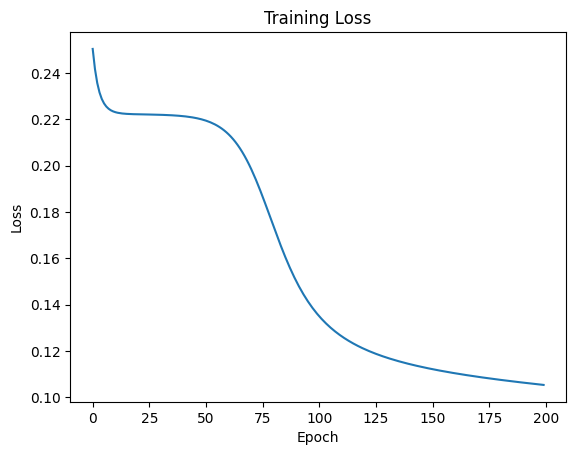

Test Accuracy: 83.33%
Confusion Matrix:
[[10  0  0]
 [ 0  4  5]
 [ 0  0 11]]


In [ ]:
# Initialize MLP
input_size = X_train.shape[1]
hidden_size = 5
output_size = y_train.shape[1]
mlp = MLP(input_size, hidden_size, output_size)

# Train the network
epochs = 200
learning_rate = 0.01
losses = mlp.train(X_train, y_train, epochs, learning_rate)

# Plot training loss
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Evaluate on test set
y_pred = mlp.predict(X_test)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)




Training with hidden_size = 5
Epoch 0, Loss: 0.2496443715619704

Training with hidden_size = 10
Epoch 0, Loss: 0.24972979845929655

Training with hidden_size = 20
Epoch 0, Loss: 0.25024610257402946


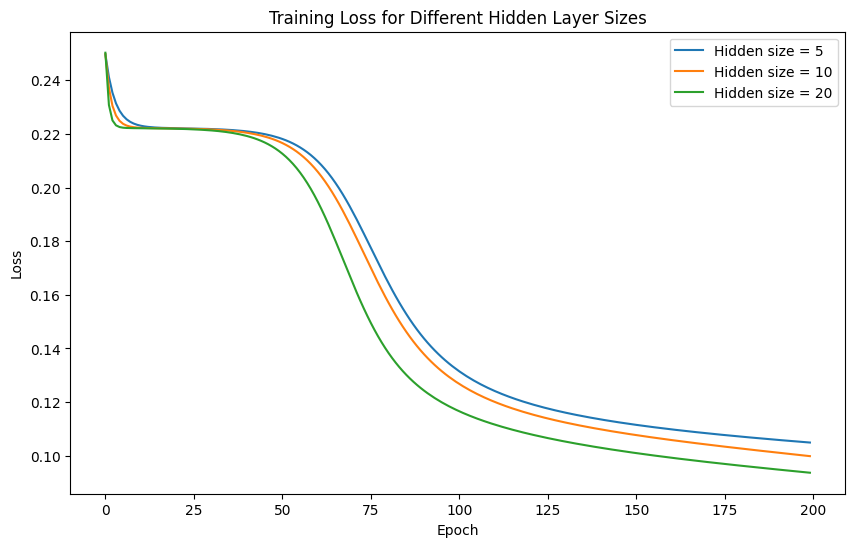


Results for hidden_size = 5:
Test Accuracy: 83.33%
Confusion Matrix:
[[10  0  0]
 [ 0  4  5]
 [ 0  0 11]]

Results for hidden_size = 10:
Test Accuracy: 93.33%
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]

Results for hidden_size = 20:
Test Accuracy: 93.33%
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


In [ ]:
# Initialize MLP with different hidden layer sizes
hidden_sizes = [5, 10, 20]
results = {}

for hidden_size in hidden_sizes:
    print(f"\nTraining with hidden_size = {hidden_size}")
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    mlp = MLP(input_size, hidden_size, output_size)

    # Train the network
    learning_rate = 0.01
    losses = mlp.train(X_train, y_train, epochs, learning_rate)

    # Evaluate on test set
    y_pred = mlp.predict(X_test)
    y_true = np.argmax(y_test, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    results[hidden_size] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'losses': losses
    }

# Plot training losses for all configurations
plt.figure(figsize=(10, 6))
for hidden_size, res in results.items():
    plt.plot(res['losses'], label=f'Hidden size = {hidden_size}')
plt.title('Training Loss for Different Hidden Layer Sizes')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print results
for hidden_size, res in results.items():
    print(f"\nResults for hidden_size = {hidden_size}:")
    print(f'Test Accuracy: {res["accuracy"] * 100:.2f}%')
    print('Confusion Matrix:')
    print(res["confusion_matrix"])

Training with ReLU:
Epoch 0, Loss: 0.25000698557774176

Training with Sigmoid:
Epoch 0, Loss: 0.24993240101843606

Results with ReLU:
Test Accuracy: 96.67%
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Results with Sigmoid:
Test Accuracy: 93.33%
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


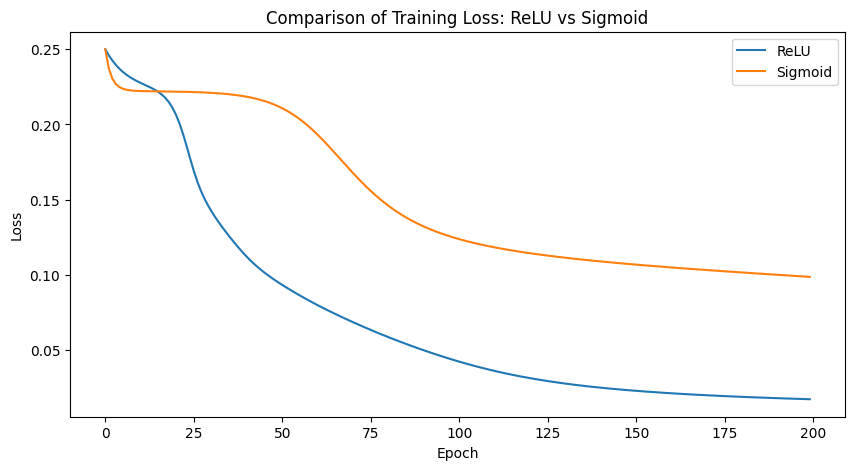

In [ ]:
class MLP_ReLU:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights with random values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Hidden layer with ReLU
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)

        # Output layer with sigmoid (for multi-class classification)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def backward(self, X, y, output, learning_rate):
        # Calculate error
        error = y - output

        # Backpropagation
        d_output = error * self.sigmoid_derivative(output)
        error_hidden = d_output.dot(self.W2.T)
        d_hidden = error_hidden * self.relu_derivative(self.a1)

        # Update weights and biases
        self.W2 += self.a1.T.dot(d_output) * learning_rate
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.W1 += X.T.dot(d_hidden) * learning_rate
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        losses = []
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)
            loss = np.mean(np.square(y - output))
            losses.append(loss)
            if i % 1000 == 0:
                print(f'Epoch {i}, Loss: {loss}')
        return losses

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# مقایسه مدل با ReLU و Sigmoid
hidden_size = 10  # انتخاب اندازه بهینه از آزمایش قبلی
mlp_relu = MLP_ReLU(input_size, hidden_size, output_size)
mlp_sigmoid = MLP(input_size, hidden_size, output_size)  # مدل اصلی با sigmoid

# آموزش هر دو مدل
epochs = 200
learning_rate = 0.01
print("Training with ReLU:")
losses_relu = mlp_relu.train(X_train, y_train, epochs, learning_rate)
print("\nTraining with Sigmoid:")
losses_sigmoid = mlp_sigmoid.train(X_train, y_train, epochs, learning_rate)

# ارزیابی
y_pred_relu = mlp_relu.predict(X_test)
y_pred_sigmoid = mlp_sigmoid.predict(X_test)
y_true = np.argmax(y_test, axis=1)

print("\nResults with ReLU:")
print(f'Test Accuracy: {accuracy_score(y_true, y_pred_relu) * 100:.2f}%')
print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred_relu))

print("\nResults with Sigmoid:")
print(f'Test Accuracy: {accuracy_score(y_true, y_pred_sigmoid) * 100:.2f}%')
print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred_sigmoid))

# رسم نمودار مقایسه‌ای
plt.figure(figsize=(10, 5))
plt.plot(losses_relu, label='ReLU')
plt.plot(losses_sigmoid, label='Sigmoid')
plt.title('Comparison of Training Loss: ReLU vs Sigmoid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Training with learning rate = 0.1
Epoch 0, Loss: 0.25045372806048094

Training with learning rate = 0.01
Epoch 0, Loss: 0.2490742279393408

Training with learning rate = 0.001
Epoch 0, Loss: 0.2503296273832462

Training with learning rate = 0.0001
Epoch 0, Loss: 0.2495059917283856


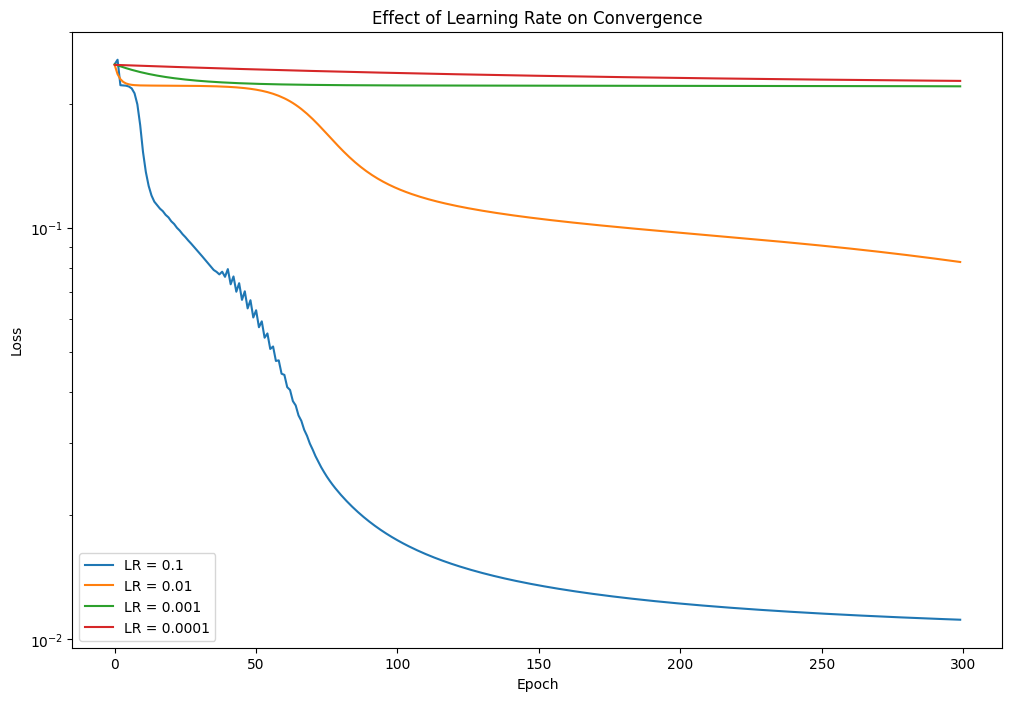


Results for learning rate = 0.1:
Test Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Results for learning rate = 0.01:
Test Accuracy: 93.33%
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]

Results for learning rate = 0.001:
Test Accuracy: 30.00%
Confusion Matrix:
[[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]

Results for learning rate = 0.0001:
Test Accuracy: 30.00%
Confusion Matrix:
[[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]


In [ ]:
# پارامترهای ثابت
input_size = X_train.shape[1]
hidden_size = 10  # انتخاب بر اساس بهترین نتیجه قبلی
output_size = y_train.shape[1]
epochs = 300

# نرخ‌های یادگیری مختلف برای آزمایش
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")
    mlp = MLP(input_size, hidden_size, output_size)
    losses = mlp.train(X_train, y_train, epochs, lr)

    # ارزیابی مدل
    y_pred = mlp.predict(X_test)
    y_true = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    results[lr] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'losses': losses
    }

# رسم نمودارهای همگرایی
plt.figure(figsize=(12, 8))
for lr, res in results.items():
    plt.plot(res['losses'], label=f'LR = {lr}')
plt.title('Effect of Learning Rate on Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')  # استفاده از مقیاس لگاریتمی برای نمایش بهتر
plt.show()

# نمایش نتایج
for lr, res in results.items():
    print(f"\nResults for learning rate = {lr}:")
    print(f'Test Accuracy: {res["accuracy"]*100:.2f}%')
    print('Confusion Matrix:')
    print(res["confusion_matrix"])